In [4]:
import osmnx as ox
import geojson
import pandas as pd
import os

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    # Fetch postal code polygons from OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    postal_code_polygon_dict = {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}
    return postal_code_polygon_dict

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    # Create GeoJSON features from the input data
    geojson_features = [geojson.Feature(geometry=polygon, properties={"postal_code": postal_code}) for postal_code, polygon in data.items()]
    
    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    # Determine the script's directory
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    
    # Create the full path for the GeoJSON file
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

# User input for the city or country name
place_input = input("Geben Sie den Stadtnamen oder Ländernamen ein: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {saved_file_path}")


Kassel GeoJSON data saved to c:\Users\hamud\Documents\Retoflow\Project_Filter\Retoflow_Filter\Check_Out_Leon\Kassel_geojson_data.geojson


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


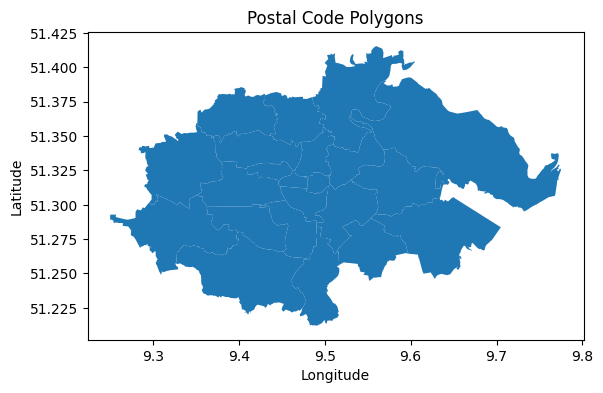

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_geojson_data(geojson_file_path):
    """
    Plots GeoJSON data using GeoPandas.
    """
    # Load GeoJSON data using GeoPandas
    gdf = gpd.read_file(geojson_file_path)

    # Plot GeoDataFrame
    gdf.plot()

    # Display the plot
    plt.title("Postal Code Polygons")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Beispielaufruf der Plot-Funktion
plot_geojson_data(saved_file_path)